<center><h1> Expansion of Renewable Energy Resource Infrastructure:</center></h1>
<center><h1> A Case Study of Spain</center></h1>

</b>
</b>
</b>

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Exploratory Data Analysis (EDA)</a>
    
&nbsp;&nbsp;&nbsp;&nbsp;<a href=#twoone>2.1 Data Collection</a>

&nbsp;&nbsp;&nbsp;&nbsp;<a href=#twotwo>2.2. Data Cleaning</a>

&nbsp;&nbsp;&nbsp;&nbsp;<a href=#twothree>2.3. Univariate Analysis</a>

&nbsp;&nbsp;&nbsp;&nbsp;<a href=#twofour>2.4. Multivariate Analysis</a>


<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

## Introduction

Electricity is a very important factor in developing the economy and the standard of living of a country. It must be generated using the national resource of that country. Bangladesh largely depends on natural gas and hydro power stations to generate major portion of power. The country lags behind than its expected production capacity. Though many power generation units have been added to the national grid to solve the power crisis issue, it is not enough. High demand and increasing need of power have created challenge for the power stations to meet the demand. In our country, a major portion of total population still does not have the access to electricity. Only 10% of the rural households have electricity connection and there are some parts of Bangladesh which will not get the access of electricity connection from the national grid within next 30 years [1]. To solve this energy crisis we can use different form of renewable energy to generate power. Renewable energy is the energy that comes from different types of natural resources mainly from sunlight, wind, rain, tides, and geo thermal heat, biodiesel, bio fuel etc.

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

The following packages will be improted for use within out implementation:
1. [Pandas](https://pandas.pydata.org/) - an open source data analysis and manipulation tool, built on top of the Python programming language.
2. [NumPy](https://numpy.org/) - a tool that offers arrays comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.
3. [Seaborn](https://seaborn.pydata.org/) -a Python data visualization library based on matplotlib.
4. [sklearn]() - set of tools for predictive data analysis built on NumPy, SciPy, and matplotlib.

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
# Import train/test splitting function from sklearn to split the data into training and testing data
from sklearn.model_selection import train_test_split
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge
#Importing the linear model from Sklearn
from sklearn.linear_model import LinearRegression
# Import metrics module
from sklearn import metrics
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Exploratory Data Analysis (EDA)
<a class="anchor" id="2"></a>
<a href=#cont>Back to Table of Contents</a>

"Exploratory Data Analysis refers to the critical process of performing initial investigations on data ... with the help of summary statistics and graphical representations."<sup>2
    
EDA unearths a lot of important information which can easyly be missed, especally with large sets of data. This information is known to help the analysis process in the long run, from revealing insights on how to frame questions to displaying the results. 

Carrying out a throrough EDA will often lead to:

<ul>
<li>Identifying erroneous and missing data</li>
<li>Understanding the basic structure of the data as well as mapping it out</li>
<li>Spotting the most important variables in the dataset</li>
<li>Assessing a hypothesis related to a specific model</li>
<li>Establishing a model that can explain the data using minimum number of variables)</li>
<li>Approximating parameters and compting the margins of error.</li>
</ul>
    
The following are the steps involved in EDA:
<ol type="1">
    <li> <b>Data Collection</b> - The data used here has been obtained from the government of Spain, a reliable source.</li> 
<li> <b>Data Cleaning</b> - this is the removal of anomalies, e.g. unwanted values or variables, from the dataset which can skew the data and thus negatively affect the results.</li> 
<li><b>Univariate Analysis</b> - this is the process of analyzing data of just one variable (a single feature/column). We will implement both graphical or non-graphical techniues.</li> 
<li><b>Multivariate Analysis</b> - This is the process of comparing two or more variables. We will implement both graphical or non-graphical techniues here as well.</li> 
</ol> 

<a id="twoone"></a>
### 2.1. Data Collection
<a class="anchor" id="2.1"></a>
<a href=#cont>Back to Table of Contents</a>

The government of Spain has been tracking the different energy sources available within the country out of which, they have provided two data sets in the form of comma-separated values (CSV) files. 

The first, the train dataset, will eventually be used to train the model(s) while the second, the test dataset, will be used to test the preformance of the model(s).

The two datasets will be loaded into Python DataFrames using the pandas package. 

In [2]:
# loading the data
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv', index_col=0)

In [3]:
# Checking the content of the original train data
df_train.head() 

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
# Checking the content of the original test data
df_test.head() 

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


To make sure we do not loose our original dataset in cases of mistakes, we will use a copy of the data frame from now henceforth. 

In [5]:
# create a copy of the train dataset
df_train2 = df_train.copy()

# create a copy of the test dataset
df_test2 = df_test.copy()

In [6]:
# Checking the content of the copied test data
df_train2.head() 

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [7]:
# Checking the content of the codied test data
df_test2.head() 

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="twotwo"></a>
### 2.2. Data Cleaning
<a class="anchor" id="2.2"></a>
<a href=#cont>Back to Table of Contents</a>

Data cleaning will start by checking for, and deleting, any columns that are purely made up of unique values. This is because they are not strongly predictive when it comes to supervised machine learning.

**NOTE:** We will work on cleaning the train dataset first then replicate all the steps followed to clean the test dataset

In [8]:
# interate through all train dataset columns 
# to see if the number of rows of unique values
# is equal to the number of rows of the dataset
# if true, the column is purely made of unqiue values
for (columnName, columnData) in df_train2.iteritems():
    if len(df_train2[columnName].value_counts()) == len(df_train2):
        # print name of column with uniue values
        print(columnName)

Unnamed: 0
time


In [9]:
# interate through all test dataset columns 
# to see if the number of rows of unique values
# is equal to the number of rows of the dataset
# if true, the column is purely made of unqiue values
for (columnName, columnData) in df_test2.iteritems():
    if len(df_test2[columnName].value_counts()) == len(df_test2):
        # print name of column with uniue values
        print(columnName)

time


On the train dataset:

1. the **Unnamed: 0** column looks like the index column and will therfore be deleted (dropped).

2. The **time** column, on the other hand has relevant data. A quick glance will reveal that the way it is captured, year-week-day-hour-minute-second, inevitablly makes the column unique so it will not be deleted.

On the test dataset, the only unique column is time which, as explained above, is of value and will not be deleted.

In [10]:
# Drop the Unnamed Column
df_train2 = df_train2.drop('Unnamed: 0', axis=1)

In [11]:
# Let's ensure that we have successfully dropped the unnamed column 
# in our train dataset as observed before. View first 2 rows
# as well as the number of columns (should be 49-1)
df_train2.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


To avoid using the column names as variable names later on, we will check is some of the columns have white space which will be replaced with an underscore.

In [12]:
# view train set column names for possible white spaces
df_train2.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

In [13]:
# view test set column names for possible white spaces
df_test2.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

From the above observations of the train and test datasets, no column names have white space.

<a id="twothree"></a>
### 2.3. Univariate Analysis
<a class="anchor" id="2.3"></a>
<a href=#cont>Back to Table of Contents</a>

Univariate analysis is urguably the simplest form of statistical analysis. It is the process of analysing one ("uni") variable/ column ("variate"). 

We will start by checking if there are any missing values per column using both graphical and non-graphical techniques.

In [14]:
# check for number of null entries per column in train dataset
# (non-graphical represantation)
df_train2.isnull().sum(axis = 0)

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

<AxesSubplot:>

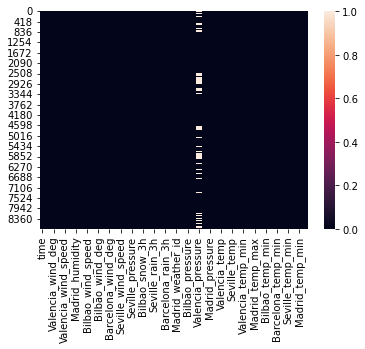

In [15]:
# plotting a heatmap of missing values on train dataset
# (graphical representation)
sns.heatmap(df_train2.isnull())

In [16]:
# check for number of null entries per column in test dataset
# (non-graphical represantation)
df_test2.isnull().sum(axis = 0)

time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity   

<AxesSubplot:>

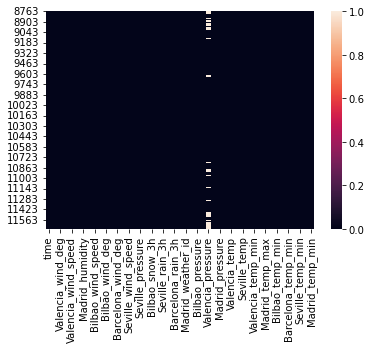

In [17]:
# plotting a heatmap of missing values on test dataset
# (graphical representation)
sns.heatmap(df_test2.isnull())

From the above observations, the column Valencia_pressure is the only column with missing values with 2068 values missing on the train set and 454 values missinf on the test set. The heatmaps further show how the missing values are spread within the respective columns. 

Let us investigate the character of these variables/ columns by plotting the relevant graphs. This step is to aid us in deciding which of the three statistical measures of central tendency we will use to replace the blank values.

We will start with the distribution plot from Seaborn which will represent the overall distribution of the variable and reveal its skewness.

C:\Users\Paul Abutto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Valencia_pressure', ylabel='Density'>

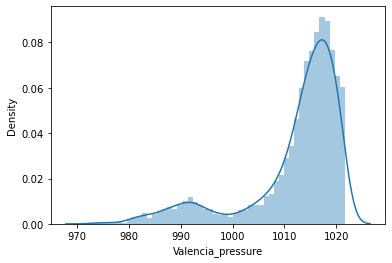

In [18]:
# plot a distribution graph for Valencia_pressure train set
sns.distplot(df_train2['Valencia_pressure'])

C:\Users\Paul Abutto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Valencia_pressure', ylabel='Density'>

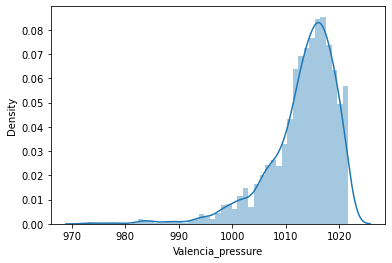

In [19]:
# plot a distribution graph for Valencia_pressure test set
sns.distplot(df_test2['Valencia_pressure'])

We will use the K-nearest neighbours (KNN) algorithm to replace missing values once we are done with EDA. This is because KNN requires for the data to be [scaled](https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data#:~:text=of%20these%20options.-,Scaling,%2Dnearest%20neighbors%2C%20or%20KNN) which will change all our table values and we still have some exploritory data analysis to do on the unscaled data.

Next, we will look at the datatypes of each column. This is because machine learning models can only use numeric data types so all relevant object datatypes will have to be converted to appropriate numeric values to change their data types.

In [20]:
# summary of colums of type object on train dataset
df_train2.describe(include=['object'])

,time,Valencia_wind_deg,Seville_pressure
count,8763,8763,8763
unique,8763,10,25
top,2015-01-01 03:00:00,level_1,sp13
freq,1,1072,500


In [21]:
# summary of colums of type object on test dataset
df_test2.describe(include=['object'])

,time,Valencia_wind_deg,Seville_pressure
count,2920,2920,2920
unique,2920,10,25
top,2018-01-01 00:00:00,level_8,sp1
freq,1,414,233


On both datasets, three columns have been identified of type object that will need to undergo conversion.  

       a. Valencia_wind_deg
       b. Seville_pressure 
       c. time 

Lets first take a look at the unique values on Valencia_wind_deg and Seville_pressure to see what we are dealing with:

In [22]:
# get the unique values of 'Valencia_wind_deg' column
# on train dataset
df_train2.Valencia_wind_deg.unique()

array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

In [23]:
# get the unique values of 'Valencia_wind_deg' column
# on test dataset
df_test2.Valencia_wind_deg.unique()

array(['level_8', 'level_7', 'level_9', 'level_6', 'level_4', 'level_2',
       'level_3', 'level_1', 'level_10', 'level_5'], dtype=object)

In [24]:
# get the unique values of 'Seville_pressure' column
# on train  dataset
df_train2.Seville_pressure.unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

In [25]:
# get the unique values of 'Seville_pressure' column
# on test dataset
df_test2.Seville_pressure.unique()

array(['sp25', 'sp24', 'sp23', 'sp22', 'sp21', 'sp19', 'sp17', 'sp16',
       'sp12', 'sp4', 'sp2', 'sp1', 'sp3', 'sp5', 'sp10', 'sp13', 'sp15',
       'sp18', 'sp20', 'sp14', 'sp9', 'sp6', 'sp8', 'sp7', 'sp11'],
      dtype=object)

For both train and test datasets, 

1. **Valencia_wind_deg** is composed of categorical data labeled between *Level_1* to *Level_10*. 
2. **Seville_pressure** is composed of categorical data labeled between *sp1* to *sp25*.

To convert these categarical columns into numerical datatypes, we will create data dummies for both **Valencia_wind_deg** and **Seville_pressure**. This will create new columns for each category and set each column values to boolean in numerics form. 

In [26]:
# selecting and creating the dummy variables 
# for the train set categorical features
cat_var_train = df_train2[['Valencia_wind_deg', 'Seville_pressure']]
cat_var_dum_train = pd.get_dummies(cat_var_train, drop_first=True)
cat_var_dum_train.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
# selecting and creating the dummy variables 
# for the test set categorical features
cat_var_test = df_test2[['Valencia_wind_deg', 'Seville_pressure']]
cat_var_dum_test = pd.get_dummies(cat_var_test, drop_first=True)
cat_var_dum_test.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
8763,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8764,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8765,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8766,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8767,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
#cancatenate the train dummy categorical columns to the train dataset
df_train2 = pd.concat([df_train2, cat_var_dum_train], axis=1)

In [29]:
# view train set column names to ensure the impute was successful
df_train2.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

In [30]:
# cancatenate the test dataset dummy categorical columns to the test dataset
df_test2 = pd.concat([df_test2, cat_var_dum_train], axis=1)

In [31]:
# view test set column names to ensure the impute was successful
df_train2.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

Let us work on the final object datatype column, **time** by first exploring the content of the column.

In [32]:
# summary of type of data on time column on train dataset 
df_train2['time'].head()

0    2015-01-01 03:00:00
1    2015-01-01 06:00:00
2    2015-01-01 09:00:00
3    2015-01-01 12:00:00
4    2015-01-01 15:00:00
Name: time, dtype: object

In [33]:
# summary of type of data on time column on test dataset 
df_test2['time'].head()

8763    2018-01-01 00:00:00
8764    2018-01-01 03:00:00
8765    2018-01-01 06:00:00
8766    2018-01-01 09:00:00
8767    2018-01-01 12:00:00
Name: time, dtype: object

For both the train and test datasets, the values within the **time** columns appear to be in *datetime* format but saved in *object* form. The first thing we will do is convert these values from *object* to *datetime* datatypes for both datasets.

In [34]:
#converting the time column to datetime data type on the train dataset
df_train2['time'] = pd.to_datetime(df_train2['time'])

In [35]:
#converting the time column to datetime data type on the test dataset
df_test2['time'] = pd.to_datetime(df_test2['time'])

Unfortunatley, not all machine learning models can interprate the *datetime* data type. For this reason, we will convert the **time** column into a numeric by further breaking it down to different column to represent the year, month, day, hour, minute and second.

In [36]:
# creating the temporal features for train dataset
df_train2['Day_of_Week'] = df_train2['time'].dt.dayofweek
df_train2['Week_of_Year'] = df_train2['time'].dt.weekofyear
df_train2['Day_of_Year'] = df_train2['time'].dt.dayofyear
df_train2['Month_of_Year'] = pd.DatetimeIndex(df_train2['time']).month #Actual Month
df_train2['Year'] = pd.DatetimeIndex(df_train2['time']).year #Actual Year
df_train2['Day_of_Month'] = pd.DatetimeIndex(df_train2['time']).day #Day of month
df_train2['Hour_of_Day'] = pd.DatetimeIndex(df_train2['time']).hour #Hour of day
df_train2['Hour_of_Year'] = (df_train2['time'].dt.dayofyear )* 24 + df_train2['time'].dt.hour #Hour of year -1
df_train2['Hour_of_Week'] = (df_train2['time'].dt.dayofweek ) * 24 +  df_train2['time'].dt.hour #Hour of week

df_train2.head()

C:\Users\PAULAB~1\AppData\Local\Temp/ipykernel_13532/3866977082.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train2['Week_of_Year'] = df_train2['time'].dt.weekofyear


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Seville_pressure_sp9,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,0,3,1,1,1,2015,1,3,27,75
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,0,3,1,1,1,2015,1,6,30,78
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,0,3,1,1,1,2015,1,9,33,81
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,0,3,1,1,1,2015,1,12,36,84
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,0,3,1,1,1,2015,1,15,39,87


In [37]:
# creating the temporal features for test dataset
df_test2['Day_of_Week'] = df_test2['time'].dt.dayofweek
df_test2['Week_of_Year'] = df_test2['time'].dt.weekofyear
df_test2['Day_of_Year'] = df_test2['time'].dt.dayofyear
df_test2['Month_of_Year'] = pd.DatetimeIndex(df_test2['time']).month #Actual Month
df_test2['Year'] = pd.DatetimeIndex(df_test2['time']).year #Actual Year
df_test2['Day_of_Month'] = pd.DatetimeIndex(df_test2['time']).day #Day of month
df_test2['Hour_of_Day'] = pd.DatetimeIndex(df_test2['time']).hour #Hour of day
df_test2['Hour_of_Year'] = (df_test2['time'].dt.dayofyear )* 24 + df_test2['time'].dt.hour #Hour of year -1
df_test2['Hour_of_Week'] = (df_test2['time'].dt.dayofweek ) * 24 +  df_test2['time'].dt.hour #Hour of week

df_test2.head()

C:\Users\PAULAB~1\AppData\Local\Temp/ipykernel_13532/753619522.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_test2['Week_of_Year'] = df_test2['time'].dt.weekofyear


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Seville_pressure_sp9,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,NaN,0.0,1.0,1.0,1.0,2018.0,1.0,0.0,24.0,0.0
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,NaN,0.0,1.0,1.0,1.0,2018.0,1.0,3.0,27.0,3.0
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,NaN,0.0,1.0,1.0,1.0,2018.0,1.0,6.0,30.0,6.0
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,NaN,0.0,1.0,1.0,1.0,2018.0,1.0,9.0,33.0,9.0
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,NaN,0.0,1.0,1.0,1.0,2018.0,1.0,12.0,36.0,12.0


<a id="twofour"></a>
### 2.4. Multivariate Analysis
<a class="anchor" id="2.4"></a>
<a href=#cont>Back to Table of Contents</a>

Multivariate analysis is the process of analysing more than one type of variable/ column where by multiple measurements are made on each variable/ column and the relationships among them, as well as their structures, are established.

The first step will be to check on correlation, that is, find out if ther is a mutual relationship or connection between the features and the target variable load_shortfall_3h by interpreting the **correlation coefficients**. 

**Correlation coefficients** have values of between *-1* and *1*. A value of *0* means there is no relationship between the variables at all, *-1* or 1  or positive correlation (negative or positive correlation here refers to the type of graph the relationship will produce).

We will be using the train dataset for this exercise.

In [39]:
# evaluate correlation - this shows how a given feature value correlates to other features in the dataframe
correlation = df_train2.corr()
# evaluating the correlation btw the features and the target variable
correlation['load_shortfall_3h'].sort_values(ascending=False)

load_shortfall_3h    1.000000
Hour_of_Year         0.205906
Day_of_Year          0.205528
Valencia_temp_min    0.201863
Week_of_Year         0.201080
                       ...   
Madrid_humidity     -0.150536
Madrid_wind_speed   -0.150981
Bilbao_rain_1h      -0.152510
Day_of_Week         -0.156510
Seville_humidity    -0.167290
Name: load_shortfall_3h, Length: 87, dtype: float64

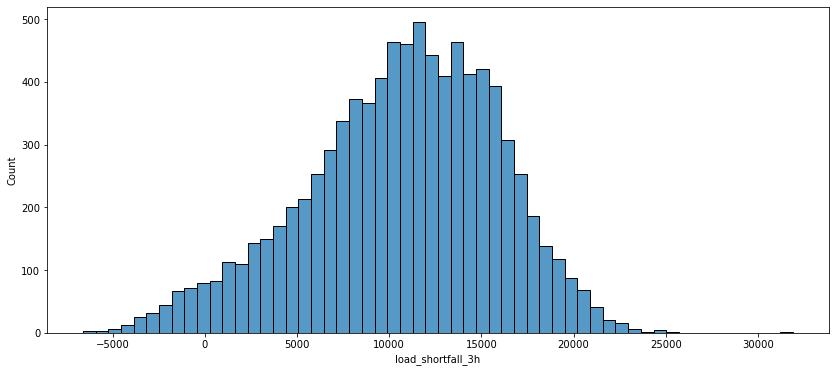

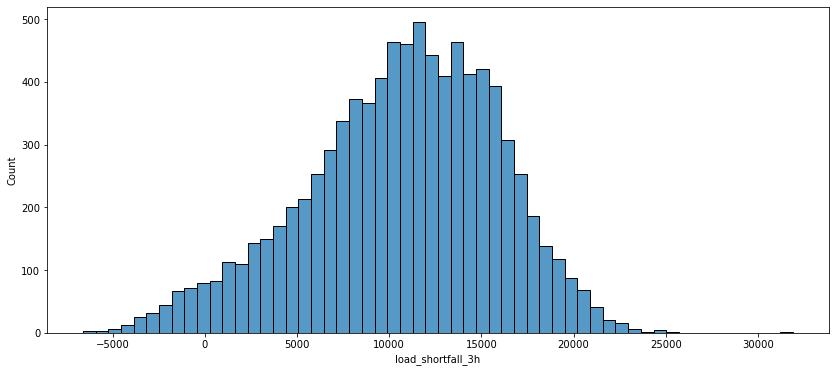

In [158]:
# have a look at feature distributions
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(df_train['load_shortfall_3h'])
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [167]:
# Creating a dataframe of our response or target variable
response_y = df2['load_shortfall_3h']

In [166]:
#dropping the column with Object data type - a technique to improve our model
df2 = df2.drop(['time', 'Valencia_wind_deg', 'Seville_pressure'], axis=1)

In [168]:
df2 = df2.drop('load_shortfall_3h', axis=1)
df2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,265.938000,3,1,1,1,2015,1,3,27,75
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,266.386667,3,1,1,1,2015,1,6,30,78
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,272.708667,3,1,1,1,2015,1,9,33,81
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,281.895219,3,1,1,1,2015,1,12,36,84
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,280.678437,3,1,1,1,2015,1,15,39,87


,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,265.938000,3,1,1,1,2015,1,3,27,75
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,266.386667,3,1,1,1,2015,1,6,30,78
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,272.708667,3,1,1,1,2015,1,9,33,81
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,281.895219,3,1,1,1,2015,1,12,36,84
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,280.678437,3,1,1,1,2015,1,15,39,87


Here the StandarScaler is used to resize the features of the dataframe

In [169]:
# create scaler object
scaler = StandardScaler()

In [170]:
# convert the scaled predictor values into a dataframe
df2 = pd.DataFrame(scaler.fit_transform(df2),columns = df2.columns)
df2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,-2.309892,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-1.090901,-1.731947,-0.157423
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,-2.261154,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.654451,-1.730761,-0.095526
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,-1.574407,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.218001,-1.729575,-0.033629
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,-0.576488,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.218449,-1.728389,0.028268
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,-0.708665,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.654899,-1.727204,0.090165


,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,-2.309892,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-1.090901,-1.731947,-0.157423
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,-2.261154,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.654451,-1.730761,-0.095526
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,-1.574407,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.218001,-1.729575,-0.033629
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,-0.576488,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.218449,-1.728389,0.028268
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,-0.708665,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.654899,-1.727204,0.090165


Here we use the K-nearest neighbours (KNN) Algorithm to Impute the missing valuse, KNN calculates the mean of the neighbours based on the number of neighbours specified in side pramenter here we are using (5) as the number of neighbours

In [171]:
# feature engineering on existing features
# This also imputes missing values of the features
imputer = KNNImputer(n_neighbors=6)
df2 = pd.DataFrame(imputer.fit_transform(df2),columns = df2.columns)

In [172]:
df2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,-2.309892,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-1.090901,-1.731947,-0.157423
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,-2.261154,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.654451,-1.730761,-0.095526
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,-1.574407,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.218001,-1.729575,-0.033629
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,-0.576488,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.218449,-1.728389,0.028268
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,-0.708665,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.654899,-1.727204,0.090165


,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,-2.309892,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-1.090901,-1.731947,-0.157423
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,-2.261154,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.654451,-1.730761,-0.095526
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,-1.574407,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.218001,-1.729575,-0.033629
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,-0.576488,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.218449,-1.728389,0.028268
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,-0.708665,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.654899,-1.727204,0.090165


In [173]:
#df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [174]:
#cancatenating the df2 with the dummy categorical df2
df2 = pd.concat([df2, cat_var_dum], axis=1)
df2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,0,0,1,0,0,0,0,0,0,0
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,0,0,1,0,0,0,0,0,0,0
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,0,0,1,0,0,0,0,0,0,0
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,0,0,1,0,0,0,0,0,0,0
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,0,0,1,0,0,0,0,0,0,0


,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,0,0,1,0,0,0,0,0,0,0
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,0,0,1,0,0,0,0,0,0,0
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,0,0,1,0,0,0,0,0,0,0
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,0,0,1,0,0,0,0,0,0,0
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,0,0,1,0,0,0,0,0,0,0


In [175]:
#Rearranging the columns(there is actually no need of reindexing here kingly confirm the diffrence)
column_titles = [i for i in df2.columns]
df2 = df2.reindex(columns = column_titles)

In [176]:
df2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,0,0,1,0,0,0,0,0,0,0
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,0,0,1,0,0,0,0,0,0,0
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,0,0,1,0,0,0,0,0,0,0
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,0,0,1,0,0,0,0,0,0,0
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,0,0,1,0,0,0,0,0,0,0


,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,0,0,1,0,0,0,0,0,0,0
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,0,0,1,0,0,0,0,0,0,0
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,0,0,1,0,0,0,0,0,0,0
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,0,0,1,0,0,0,0,0,0,0
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,0,0,1,0,0,0,0,0,0,0


In [177]:
# Drop All temp_max and temp_min of all the cities to avoid Multicollinearity(here we need to show how they are corelated before dropping them)
df2 = df2.drop(['Seville_temp_max','Valencia_temp_max','Barcelona_temp_max','Madrid_temp_max','Bilbao_temp_max','Seville_temp_min','Valencia_temp_min','Barcelona_temp_min','Madrid_temp_min','Bilbao_temp_min'],axis=1)

In [178]:
# Now, let's drop the redundant time variables(we need to show why they are redundant)
df2 = df2.drop(['Week_of_Year','Month_of_Year', 'Day_of_Week', 'Year', 'Hour_of_Year'], axis=1)

### Cleaning the test dataframe and handling the missing values

In [179]:
#copy the test df to a new df
test_df = df_test.copy()

In [180]:
test_df['time'] = pd.to_datetime(test_df['time'])

In [181]:
test_df['Day_of_Week'] = test_df['time'].dt.dayofweek
test_df['Week_of_Year'] = test_df['time'].dt.weekofyear
test_df['Day_of_Year'] = test_df['time'].dt.dayofyear
test_df['Month_of_Year'] = pd.DatetimeIndex(test_df['time']).month #Actual Month
test_df['Year'] = pd.DatetimeIndex(test_df['time']).year #Actual Year
test_df['Day_of_Month'] = pd.DatetimeIndex(test_df['time']).day #Day of month
test_df['Hour_of_Day'] = pd.DatetimeIndex(test_df['time']).hour #Hour of day
test_df['Hour_of_Year'] = (test_df['time'].dt.dayofyear )* 24 + test_df['time'].dt.hour #Hour of year -1
test_df['Hour_of_Week'] = (test_df['time'].dt.dayofweek ) * 24 +  test_df['time'].dt.hour #Hour of week
#df_train = df_train.drop('time', axis=1)
test_df.head()

C:\Users\jeff\AppData\Local\Temp/ipykernel_6692/858496451.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_df['Week_of_Year'] = test_df['time'].dt.weekofyear


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,279.150000,0,1,1,1,2018,1,0,24,0
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,278.150000,0,1,1,1,2018,1,3,27,3
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,276.150000,0,1,1,1,2018,1,6,30,6
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,274.483333,0,1,1,1,2018,1,9,33,9
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,280.150000,0,1,1,1,2018,1,12,36,12


C:\Users\jeff\AppData\Local\Temp/ipykernel_6692/858496451.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_df['Week_of_Year'] = test_df['time'].dt.weekofyear


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,279.150000,0,1,1,1,2018,1,0,24,0
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,278.150000,0,1,1,1,2018,1,3,27,3
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,276.150000,0,1,1,1,2018,1,6,30,6
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,274.483333,0,1,1,1,2018,1,9,33,9
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,280.150000,0,1,1,1,2018,1,12,36,12


In [182]:
test_time = test_df[['time']]

In [183]:
test_time

,time
8763,2018-01-01 00:00:00
8764,2018-01-01 03:00:00
8765,2018-01-01 06:00:00
8766,2018-01-01 09:00:00
8767,2018-01-01 12:00:00
...,...
11678,2018-12-31 09:00:00
11679,2018-12-31 12:00:00
11680,2018-12-31 15:00:00
11681,2018-12-31 18:00:00


,time
8763,2018-01-01 00:00:00
8764,2018-01-01 03:00:00
8765,2018-01-01 06:00:00
8766,2018-01-01 09:00:00
8767,2018-01-01 12:00:00
...,...
11678,2018-12-31 09:00:00
11679,2018-12-31 12:00:00
11680,2018-12-31 15:00:00
11681,2018-12-31 18:00:00


In [184]:
test_time = test_time.reset_index().drop(["index"], axis=1)

In [185]:
test_time

,time
0,2018-01-01 00:00:00
1,2018-01-01 03:00:00
2,2018-01-01 06:00:00
3,2018-01-01 09:00:00
4,2018-01-01 12:00:00
...,...
2915,2018-12-31 09:00:00
2916,2018-12-31 12:00:00
2917,2018-12-31 15:00:00
2918,2018-12-31 18:00:00


,time
0,2018-01-01 00:00:00
1,2018-01-01 03:00:00
2,2018-01-01 06:00:00
3,2018-01-01 09:00:00
4,2018-01-01 12:00:00
...,...
2915,2018-12-31 09:00:00
2916,2018-12-31 12:00:00
2917,2018-12-31 15:00:00
2918,2018-12-31 18:00:00


In [186]:
#drop the categorical columns 
test_df = test_df.drop(['time', 'Valencia_wind_deg', 'Seville_pressure' ], axis=1)

In [187]:
#sacling the dataFrame using the StandarScalar
test_df = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)

In [188]:
#Imputing the missing values using Knn Imputer
test_df = pd.DataFrame(imputer.fit_transform(test_df), columns = test_df.columns)

In [189]:
test_df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,1.432590,-0.440268,0.995600,0.964514,0.360022,-0.766227,0.433023,-0.612116,0.314013,0.911814,...,-0.855293,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,-1.527525,-1.731458,-1.694498
1,1.244747,-0.440268,1.162600,1.061565,0.636255,-1.422372,0.835964,-0.612116,-0.197584,1.322013,...,-0.969818,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,-1.091089,-1.730271,-1.632732
2,-0.070152,-0.440268,0.995600,1.061565,1.119662,-1.422372,0.030083,-0.348454,-0.334010,0.911814,...,-1.198870,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,-0.654654,-1.729085,-1.570966
3,0.117691,-0.440268,1.162600,1.271842,0.829617,-0.547512,2.044786,-0.348454,0.348120,-0.113683,...,-1.389746,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,-0.218218,-1.727899,-1.509200
4,0.869062,-0.440268,2.832609,-0.086869,0.056166,-0.547512,5.066840,-0.612116,0.723291,1.322013,...,-0.740767,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,0.218218,-1.726712,-1.447435


,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,1.432590,-0.440268,0.995600,0.964514,0.360022,-0.766227,0.433023,-0.612116,0.314013,0.911814,...,-0.855293,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,-1.527525,-1.731458,-1.694498
1,1.244747,-0.440268,1.162600,1.061565,0.636255,-1.422372,0.835964,-0.612116,-0.197584,1.322013,...,-0.969818,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,-1.091089,-1.730271,-1.632732
2,-0.070152,-0.440268,0.995600,1.061565,1.119662,-1.422372,0.030083,-0.348454,-0.334010,0.911814,...,-1.198870,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,-0.654654,-1.729085,-1.570966
3,0.117691,-0.440268,1.162600,1.271842,0.829617,-0.547512,2.044786,-0.348454,0.348120,-0.113683,...,-1.389746,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,-0.218218,-1.727899,-1.509200
4,0.869062,-0.440268,2.832609,-0.086869,0.056166,-0.547512,5.066840,-0.612116,0.723291,1.322013,...,-0.740767,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,0.218218,-1.726712,-1.447435


In [190]:
#creating dummies for test categorical variables
cat_var = df_test[['Valencia_wind_deg', 'Seville_pressure']]
test_dummies = pd.get_dummies(cat_var, drop_first=True)
test_dummies.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
8763,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8764,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8765,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8766,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8767,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
8763,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8764,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8765,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8766,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8767,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Resetting the index to start from zero not (8763), which will make an additional column called index, so the index column is being drop here: this is done to make the work of concatenation easrie with out having issues with NaN

In [191]:
#resetting the index and droping the index column
test_dummies = test_dummies.reset_index().drop(["index"], axis=1)
test_dummies.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [192]:
#concatenating the test dataframe and the test_dummies dataframe
test_df = pd.concat([test_df, test_dummies], axis=1)
test_df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,1.432590,-0.440268,0.995600,0.964514,0.360022,-0.766227,0.433023,-0.612116,0.314013,0.911814,...,0,0,1,0,0,0,0,0,0,0
1,1.244747,-0.440268,1.162600,1.061565,0.636255,-1.422372,0.835964,-0.612116,-0.197584,1.322013,...,0,0,1,0,0,0,0,0,0,0
2,-0.070152,-0.440268,0.995600,1.061565,1.119662,-1.422372,0.030083,-0.348454,-0.334010,0.911814,...,0,0,1,0,0,0,0,0,0,0
3,0.117691,-0.440268,1.162600,1.271842,0.829617,-0.547512,2.044786,-0.348454,0.348120,-0.113683,...,0,0,1,0,0,0,0,0,0,0
4,0.869062,-0.440268,2.832609,-0.086869,0.056166,-0.547512,5.066840,-0.612116,0.723291,1.322013,...,0,0,1,0,0,0,0,0,0,0


,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,1.432590,-0.440268,0.995600,0.964514,0.360022,-0.766227,0.433023,-0.612116,0.314013,0.911814,...,0,0,1,0,0,0,0,0,0,0
1,1.244747,-0.440268,1.162600,1.061565,0.636255,-1.422372,0.835964,-0.612116,-0.197584,1.322013,...,0,0,1,0,0,0,0,0,0,0
2,-0.070152,-0.440268,0.995600,1.061565,1.119662,-1.422372,0.030083,-0.348454,-0.334010,0.911814,...,0,0,1,0,0,0,0,0,0,0
3,0.117691,-0.440268,1.162600,1.271842,0.829617,-0.547512,2.044786,-0.348454,0.348120,-0.113683,...,0,0,1,0,0,0,0,0,0,0
4,0.869062,-0.440268,2.832609,-0.086869,0.056166,-0.547512,5.066840,-0.612116,0.723291,1.322013,...,0,0,1,0,0,0,0,0,0,0


In [193]:
# DROPPING REDUNDANT TIME VARIABLES
test_df = test_df.drop(['Week_of_Year','Month_of_Year', 'Day_of_Week', 'Year', 'Hour_of_Year'], axis=1)

In [194]:
# Drop All temp_max and temp_min all the cities to avoid Multicollinearity
test_df = test_df.drop(['Seville_temp_max','Valencia_temp_max','Barcelona_temp_max','Madrid_temp_max','Bilbao_temp_max','Seville_temp_min','Valencia_temp_min','Barcelona_temp_min','Madrid_temp_min','Bilbao_temp_min'],axis=1)


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

#### A Brief Introduction of XGBoost Machine Learning Model

The XGBoost library implements the gradient boosting decision tree algorithm.

This algorithm is also known as gradient boosting, multiple additive regression trees, stochastic gradient boosting or gradient boosting machines.

**Boosting is an ensemble technique** where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. A popular example is the AdaBoost algorithm that weights data points that are hard to predict.

Gradient boosting is an approach where new models are created that **predict the residuals or errors** of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

This approach supports both regression and classification predictive modeling problems.

**To use the XGBoost, kindly install the library using ..... "pip install xgboost" ..... on Conda Prompt**

In [195]:
import xgboost as xgb

In [196]:
data_dmatrix = xgb.DMatrix(data=df2,label=response_y)

In [197]:
#creating the features and target variables
X = df2
y = response_y

In [198]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=50)


In [199]:
# create one or more ML models

# Create linear model
lm = LinearRegression()

#create Xgboost
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7,n_estimators = 120, max_depth = 5, subsample = 0.7, learning_rate = 0.1)

In [200]:
# Fit the Ml model
lm.fit(x_train, y_train)

xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=120, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=120, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [201]:
# evaluate our selected ML models
train_lm = lm.predict(x_train)
xgboost = xg_reg.predict(x_train)

print('linear Model :', metrics.mean_squared_error(y_train, train_lm))
print('Xgboost Model :', metrics.mean_squared_error(y_train, xgboost))

linear Model : 22543762.95953021
Xgboost Model : 4429711.312419705
linear Model : 22543762.95953021
Xgboost Model : 4429711.312419705


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [202]:
# Compare model performance
test_lm = lm.predict(x_test)
test_xgboost = xg_reg.predict(x_test)

print('linear Model :', metrics.mean_squared_error(y_test, test_lm))
print("Xgboost: ", metrics.mean_squared_error(y_test, test_xgboost))


linear Model : 23085374.824023187
Xgboost:  13667624.862885995
linear Model : 23085374.824023187
Xgboost:  13667624.862885995


In [203]:
new_prediction = xg_reg.predict(test_df)

In [204]:
#test_df = test_df.drop('load_shortfall_3h', axis=1)
new_prediction

array([ 6772.8857,  2343.7954,  2782.023 , ..., 13584.88  , 14431.959 ,
       15973.115 ], dtype=float32)

array([ 6772.8857,  2343.7954,  2782.023 , ..., 13584.88  , 14431.959 ,
       15973.115 ], dtype=float32)

In [205]:
test_df['load_shortfall_3h'] = new_prediction

In [206]:
data = test_time
data

,time
0,2018-01-01 00:00:00
1,2018-01-01 03:00:00
2,2018-01-01 06:00:00
3,2018-01-01 09:00:00
4,2018-01-01 12:00:00
...,...
2915,2018-12-31 09:00:00
2916,2018-12-31 12:00:00
2917,2018-12-31 15:00:00
2918,2018-12-31 18:00:00


,time
0,2018-01-01 00:00:00
1,2018-01-01 03:00:00
2,2018-01-01 06:00:00
3,2018-01-01 09:00:00
4,2018-01-01 12:00:00
...,...
2915,2018-12-31 09:00:00
2916,2018-12-31 12:00:00
2917,2018-12-31 15:00:00
2918,2018-12-31 18:00:00


In [207]:
data = pd.concat([data, test_df[['load_shortfall_3h']]], axis=1)

In [208]:
data.to_csv('team_jm3_sub.csv', header=True, index=False)

In [209]:
import pickle
model_save_path = "new_test_run.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(xg_reg,file)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [210]:
# discuss chosen methods logic

## Appendix

1. Problem statement: https://www.kaggle.com/c/spain-electricity-shortfall-challenge/overview
2. What is Exploratory Data Analysis?: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15